In [63]:
# Load Library
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from matplotlib_venn import venn2, venn3


In [2]:
#Load HSP result of PICRUST
df = pd.read_csv('../data/picrust2/02-EC_predicted.tsv.gz', compression='gzip', header=0, sep='\t', quotechar='"', error_bad_lines=False, index_col=0)
df

,EC:1.1.1.1,EC:1.1.1.10,EC:1.1.1.100,EC:1.1.1.101,EC:1.1.1.102,EC:1.1.1.103,EC:1.1.1.105,EC:1.1.1.107,EC:1.1.1.108,EC:1.1.1.11,...,EC:6.4.1.8,EC:6.5.1.1,EC:6.5.1.2,EC:6.5.1.3,EC:6.5.1.4,EC:6.5.1.5,EC:6.5.1.6,EC:6.5.1.7,EC:6.6.1.1,EC:6.6.1.2
sequence,,,,,,,,,,,,,,,,,,,,,
0003670ded0674981fb6ace93921cf9d,2,0,4,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
0003c2463b98a6c28926dec4040423f0,2,0,7,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
0004e798b8a4a52c71075db3de6b86a4,1,0,8,0,0,0,0,0,0,0,...,0,1,1,1,1,0,1,1,1,0
0009e05d156dac5a1094ab2b0e532970,3,0,8,0,0,0,0,0,0,0,...,0,1,1,1,1,0,1,1,1,0
0016aceac264cb884cf1188da48f7207,3,0,10,0,0,1,0,0,0,0,...,0,3,1,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffc40a7b5a34f75614720e13eb7e735c,0,0,5,0,0,0,0,0,0,0,...,0,3,1,2,0,0,1,1,1,0
ffc4c1468e8808c290dbb9d0e0f6792f,4,0,10,0,0,1,0,0,0,0,...,0,4,1,1,0,0,1,1,1,1
ffd9aad6b4181dbf96e3e4cbce0d95a7,1,0,3,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [3]:
# Split Df into samples - which ASV located in which location
df_tax = pd.read_csv('../data/qiime2/filtered/exported-feature-table/taxonomy.tsv', sep='\t', index_col=0)
df_samples = pd.read_csv('../data/qiime2/filtered/exported-feature-table/feature-table.tsv', sep='\t', skiprows=1, index_col=0)
df_samples = df_samples[df_samples.index.isin(df.index)]
indexer = []
for i in ['P5', 'P8', 'P9']:
    df_ID = df_samples.loc[:, [x for x in df_samples.columns.values if x.startswith(i)]]
    df_ID = df_ID.loc[~(df_ID==0).all(axis=1)].index
    indexer.append(df_ID)

p = []
for i in range(3):
    df_taxon = df_tax[df_tax.index.isin(indexer[i])]
    tax = [a.split(';') for a in df_taxon['Taxon']]
    phylum = []
    for b in tax:
        fill = 'others'
        for c in b:
            #print(y)
            if c.startswith(' p'):
                fill = c
        phylum.append(fill)
    p.append(phylum)
    print(len(phylum))

df_p5 = df[df.index.isin(indexer[0])]
df_p8 = df[df.index.isin(indexer[1])]
df_p9 = df[df.index.isin(indexer[2])]

4329
2736
5614


In [4]:
df_p9

,EC:1.1.1.1,EC:1.1.1.10,EC:1.1.1.100,EC:1.1.1.101,EC:1.1.1.102,EC:1.1.1.103,EC:1.1.1.105,EC:1.1.1.107,EC:1.1.1.108,EC:1.1.1.11,...,EC:6.4.1.8,EC:6.5.1.1,EC:6.5.1.2,EC:6.5.1.3,EC:6.5.1.4,EC:6.5.1.5,EC:6.5.1.6,EC:6.5.1.7,EC:6.6.1.1,EC:6.6.1.2
sequence,,,,,,,,,,,,,,,,,,,,,
0003c2463b98a6c28926dec4040423f0,2,0,7,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
0016aceac264cb884cf1188da48f7207,3,0,10,0,0,1,0,0,0,0,...,0,3,1,0,0,0,1,1,1,0
001739195218db90d8c99177320e6441,1,0,6,0,0,1,0,0,0,0,...,0,2,1,1,1,0,1,1,0,0
002135c6618a6f14de790a83e7c0af23,1,0,2,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
0024d21b0b3528590a655edb61c8c7eb,1,0,4,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb921b69b5b294ffffc2be6001a2e65,3,0,10,0,0,0,0,0,0,0,...,0,2,1,0,0,0,1,1,0,3
ffc40a7b5a34f75614720e13eb7e735c,0,0,5,0,0,0,0,0,0,0,...,0,3,1,2,0,0,1,1,1,0
ffc4c1468e8808c290dbb9d0e0f6792f,4,0,10,0,0,1,0,0,0,0,...,0,4,1,1,0,0,1,1,1,1


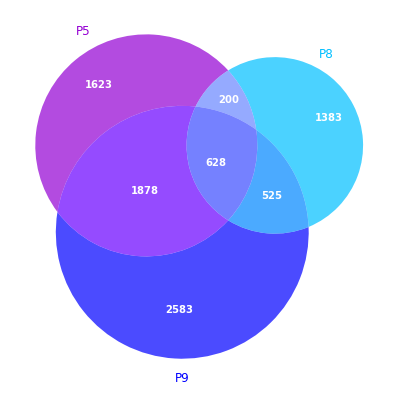

In [65]:
# What are the shared ASVs between samples?
A = set(indexer[0])
B = set(indexer[1])
C = set(indexer[2])

AB_overlap = A & B  #compute intersection of set A & set B
AC_overlap = A & C
BC_overlap = B & C
ABC_overlap = A & B & C
A_rest = A - AB_overlap - AC_overlap #see left graphic
B_rest = B - AB_overlap - BC_overlap
C_rest = C - AC_overlap - BC_overlap
AB_only = AB_overlap - ABC_overlap   #see right graphic
AC_only = AC_overlap - ABC_overlap
BC_only = BC_overlap - ABC_overlap

sets = Counter()               #set order A, B, C   
sets['100'] = len(A_rest)      #100 denotes A on, B off, C off 
sets['010'] = len(B_rest)      #010 denotes A off, B on, C off
sets['001'] = len(C_rest)      #001 denotes A off, B off, C on 
sets['110'] = len(AB_only)     #110 denotes A on, B on, C off
sets['101'] = len(AC_only)     #101 denotes A on, B off, C on 
sets['011'] = len(BC_only)     #011 denotes A off, B on, C on 
sets['111'] = len(ABC_overlap) #011 denotes A on, B on, C on
labels = ('P5', 'P8', 'P9') 

plt.figure(figsize=(7,7))
ax = plt.gca()
colors = ['darkviolet','deepskyblue','blue']
v = venn3(subsets=sets, set_labels=labels, ax=ax,set_colors=
          colors,alpha=0.7)   
i = 0
for text in v.set_labels:
    text.set_color(colors[i])
    i+=1
    
for text in v.subset_labels:
    text.set_color('white')
    #text.set_fontsize(16)
    text.set_fontweight('bold')
    
plt.show()

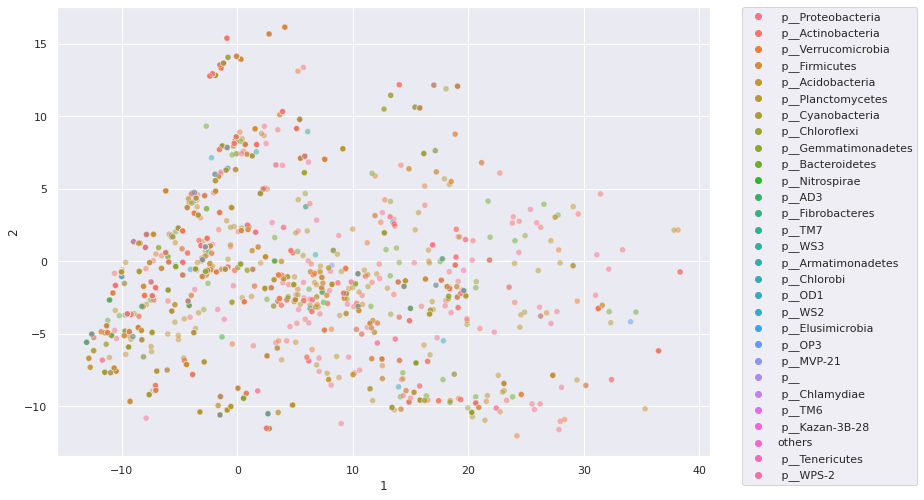

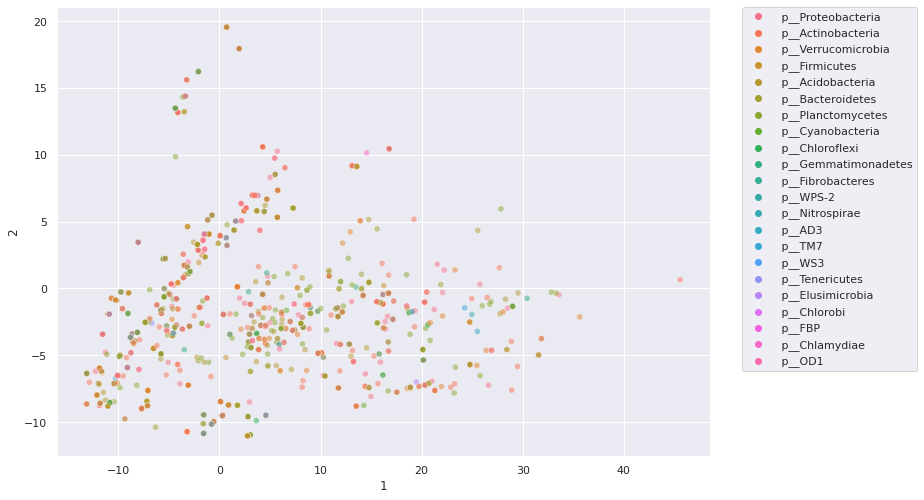

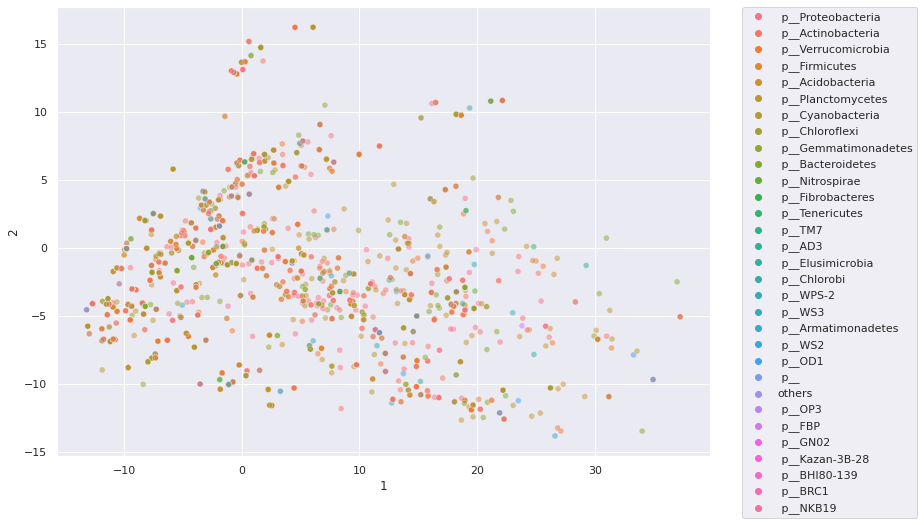

In [48]:
pca_out = []
for i in range(3):
    pca = PCA(n_components=3)
    transformed = pca.fit(df[df.index.isin(indexer[i])].values).transform(df[df.index.isin(indexer[i])].values)
    x = transformed[:, 0]
    y = transformed[:, 1]
    z = transformed[:, 2]
    
    data = pd.DataFrame(data={1:x, 2:y, 3:z, 4:p[i]})
    data.index = df[df.index.isin(indexer[i])].index
    data.to_csv('../tables/pca_picrust_'+str(i)+'.csv')
    pca_out.append(data)
    
    sns.set(style="whitegrid")
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.scatterplot(data=data, x=1, y=2, hue=4, legend=True, alpha=0.5)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    #plt.savefig('../figures/PCA.png')

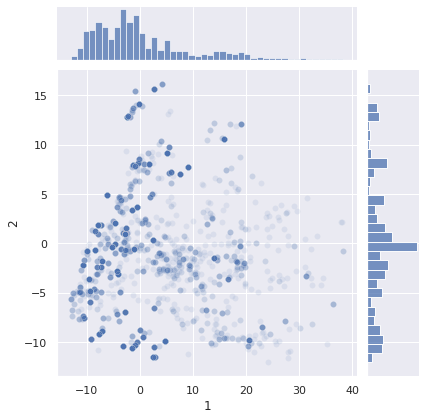

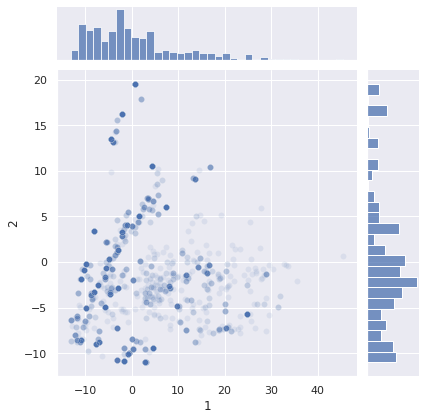

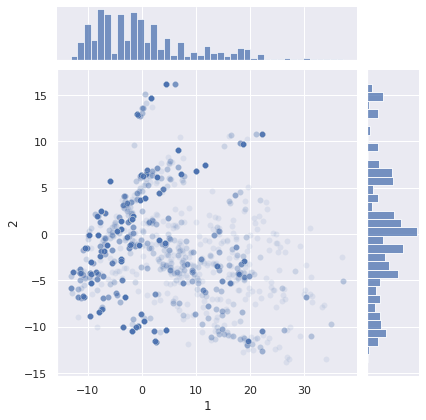

In [46]:
for i in range(3):
    sns.set(style="darkgrid")
    sns.jointplot(data=pca_out[i], x=1, y=2, legend=False, joint_kws = dict(alpha=0.1))
    #sns.jointplot(data=out[i], x=1, y=2, kind='hist')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.savefig('../figures/umapdist.png')

In [6]:
import umap
from sklearn.preprocessing import StandardScaler
reducer = umap.UMAP()

In [7]:
out =[]
for i in range(3):
    scaled_data = StandardScaler().fit_transform(df[df.index.isin(indexer[i])].values)
    embedding = reducer.fit_transform(scaled_data)
    reducer = umap.UMAP(min_dist=0.1, n_neighbors=75, n_components=2, metric='braycurtis')
    reducer.fit(df.values)

    x = embedding[:, 0]
    y = embedding[:, 1]
    data = pd.DataFrame(data={1:x, 2:y, 3:p[i]})
    out.append(data)
    


/home/WIN.DTU.DK/matinnu/miniconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


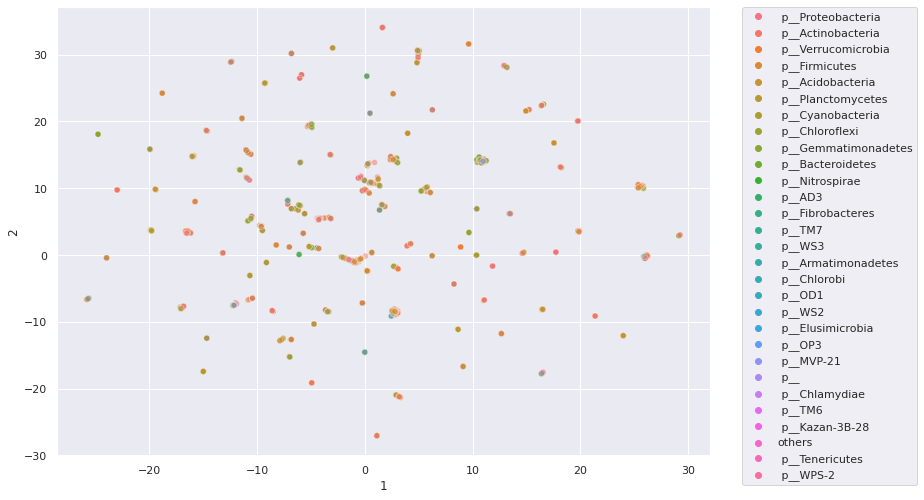

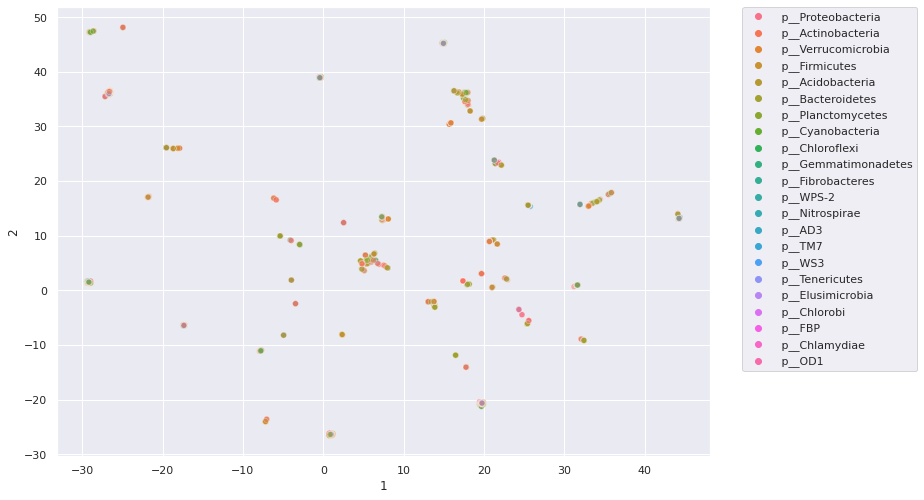

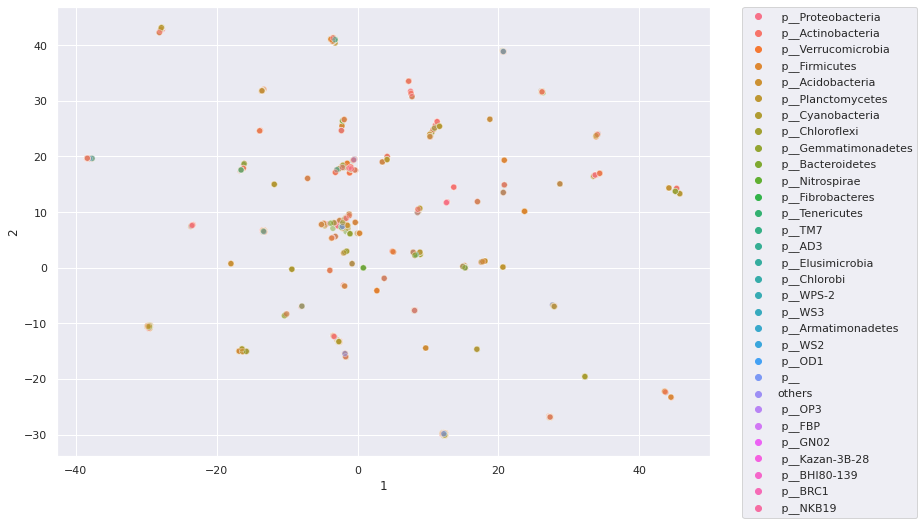

In [50]:
for i in range(3):
    sns.set(style="darkgrid")
    sns.color_palette("Paired")
    sns.scatterplot(data=out[i], x=1, y=2, 
                    hue=3, legend=True, alpha=0.5)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.show()
    #plt.savefig('../figures/UMAP.png')

In [20]:
out[0]

,1,2,3
0,-16.814400,-7.660751,p__Proteobacteria
1,1.641788,34.069153,p__Actinobacteria
2,-9.250511,25.769785,p__Verrucomicrobia
3,2.838633,-8.811066,p__Firmicutes
4,-5.062971,19.319763,p__Proteobacteria
...,...,...,...
4324,10.954030,14.065768,p__OP3
4325,-12.124226,-7.499795,p__OP3
4326,-1.997471,-0.387713,p__Acidobacteria
4327,-7.874865,-12.805572,p__Acidobacteria


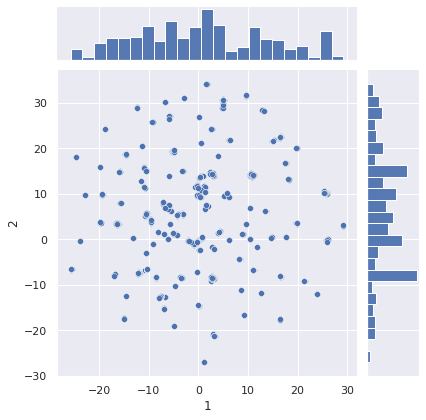

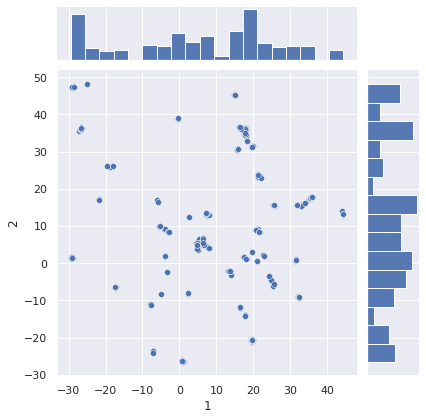

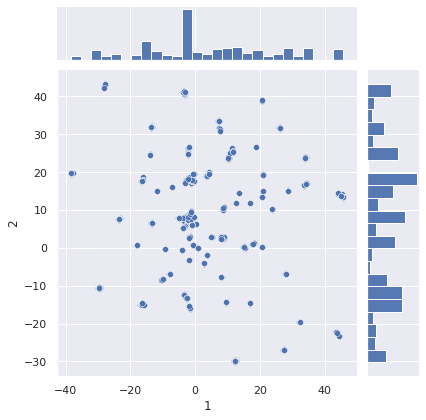

In [61]:
for i in range(3):
    sns.set(style="darkgrid")
    g = sns.jointplot(data=out[i], x=1, y=2, joint_kws = dict(alpha=0.1))
    g.plot(sns.scatterplot, sns.histplot)
    #sns.jointplot(data=out[i], x=1, y=2, kind='hex')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.savefig('../figures/umapdist.png')

reducer = umap.UMAP(min_dist=0.1, n_neighbors=200, n_components=2, metric='braycurtis')
reducer.fit(df.values)

import numpy as np
embedding = reducer.transform(df.values)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

x = embedding[:, 0]
y = embedding[:, 1]
data = pd.DataFrame(data={1:x, 2:y, 3:phylum})
sns.set(style="darkgrid")
sns.displot(data=data, x=1, y=2, legend=False, cbar=True)#, joint_kws = dict(alpha=0.5))

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

#df = pd.read_csv('2016.csv')
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("Happiness")
ax.set_ylabel("Economy")
ax.set_zlabel("Health")

ax.scatter(x, y, z)
plt.show()

def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='braycurtis', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric,
        init='random'
    )
    u = fit.fit_transform(df.values);
    x = u[:, 0]
    y = u[:, 1]
    data = pd.DataFrame(data={1:x, 2:y, 3:phylum})

    return data

data = []
for n in (15, 25, 50):
    d = draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))
    sns.scatterplot(data=i, x=1, y=2, hue=3, legend=False, alpha=0.9)
    plt.show()
    data.append(d)

sns.set(style="darkgrid")
sns.color_palette("Paired")

for i in data:
    sns.scatterplot(data=i, x=1, y=2, hue=3, legend=False, alpha=0.9)
    plt.show()
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

data

data.loc[:, [1, 2]].values

In [29]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(data, estimator[-1].labels_,
                                 metric="euclidean", sample_size=300,)
    ]

    # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [33]:
n_digits = 10
data = out[0]
labels = data.loc[:, 3].values
labels

array([' p__Proteobacteria', ' p__Actinobacteria', ' p__Verrucomicrobia',
       ..., ' p__Acidobacteria', ' p__Acidobacteria',
       ' p__Proteobacteria'], dtype=object)

In [32]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4,
                random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * '_')

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette


ValueError: could not convert string to float: ' p__Proteobacteria'

In [19]:
import matplotlib.pyplot as plt
import numpy as np
n_digits = 10
#reduced_data = PCA(n_components=2).fit_transform(data)
reduced_data = data.loc[:, [1, 2]].values
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

AttributeError: 'list' object has no attribute 'loc'

In [ ]:
reduced_data

In [34]:
kmeans = KMeans(n_clusters = 20)
kmeans.fit(reduced_data)
y_kmeans = kmeans.predict(reduced_data)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c = y_kmeans, s = 20)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 10, alpha = 0.5);
plt.show()

NameError: name 'reduced_data' is not defined

In [ ]:
len(y_kmeans)

In [ ]:
len(reduced_data[0])

In [ ]:
df_kmean = pd.DataFrame({1:reduced_data[:,0], 2:reduced_data[:,1], 3:y_kmeans, 4:labels})

In [ ]:
df_kmean[df_kmean.loc[:, 3] == 3][4].value_counts()